In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [9]:

import os
import matplotlib.pyplot as plt

import networkx as nx
from IPython.core.display import SVG, display

from autorocks.envs.synthetic.funcs import levy

_DIM = 6
G = levy.make_struct(_DIM)

In [10]:

def draw(graph, path = None):

    fmt = "svg"
    if path is not None:
        if path.endswith(".svg"):
            fmt = "svg"
        elif path.endswith(".pdf"):
            fmt = "pdf"
        else:
            print("Unrecognized file extension", path.split(".")[-1])
    svg = nx.nx_agraph.to_agraph(graph).draw(path = path, prog = "dot", format = fmt, args="-Gsize=10")
    if path is None:
        display(SVG(svg))

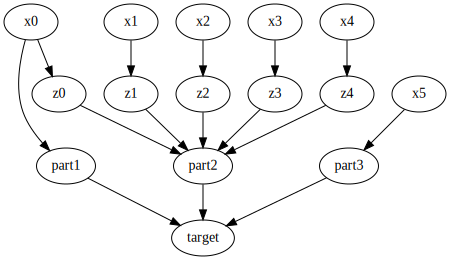

In [14]:

output_path = "/Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/levy6"

# draw(G, f"{output_path}/levy_6dag.pdf")

draw(G)


In [15]:

from autorocks.optimizer.bograph.bobn import BoBn


bobn_graph = BoBn(G, levy.make_levy_space(_DIM), {"target"})

for (i, subgraph) in enumerate(bobn_graph._subgraphs):
    draw(G.subgraph(subgraph._subgraph), f"{output_path}/subgraph_{i}.pdf")
    draw(G.subgraph(subgraph._subgraph), f"{output_path}/subgraph_{i}.svg")

draw(G, f"{output_path}/levy_dag.pdf")
draw(G, f"{output_path}/levy_dag.svg")
